In [114]:
# importing packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import pandas as pd

import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## Loading Microsoft data - (2014/11/07)

In [115]:
data = sio.loadmat('MSFT_20141107.mat')
LOB=data['LOB']
#assinging variables
t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

## Calculating Midprice, Microprice and Spread

In [116]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

## Data analysis on midprice

In [117]:
df_midprice = pd.DataFrame(midprice)
df_midprice.describe()

,0
count,234000.000000
mean,48.476670
std,0.083827
min,48.295000
25%,48.415000
50%,48.475000
75%,48.545000
max,48.915000


## Ploting Midprice

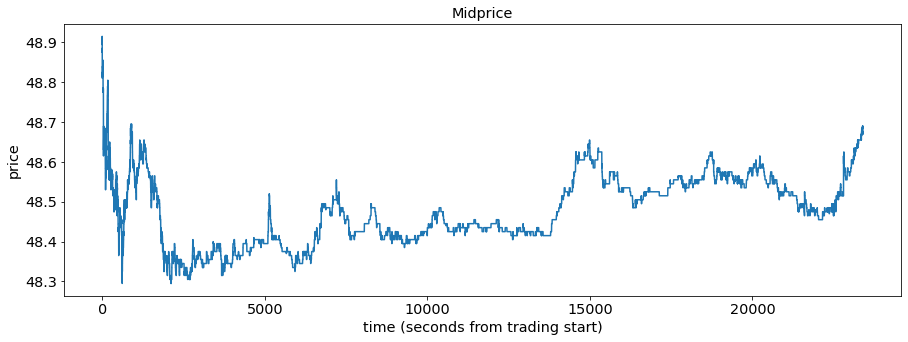

In [118]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

## Data analysis on microprice

In [119]:
df_microprice = pd.DataFrame(microprice)
df_microprice.describe()

,0
count,234000.000000
mean,48.476365
std,0.083886
min,48.294831
25%,48.414869
50%,48.471926
75%,48.543713
max,48.908000


## Ploting Microprice

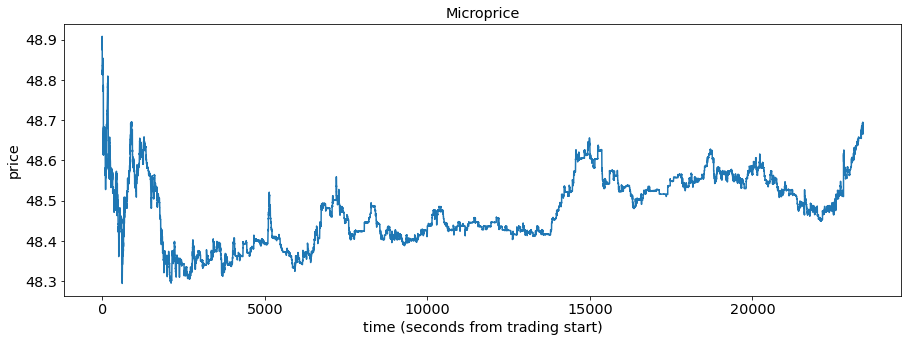

In [120]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

## Ploting difference between Microprice and Midprice

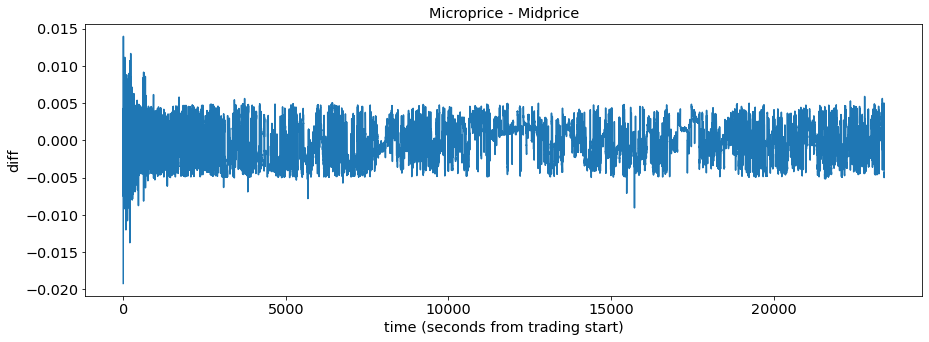

In [121]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

Generally the difference between microprice and midprice range from -0.01 to 0.01 but As we can see from above figure, the difference is larger in the beginning of the day.

## Data analysis on Spread

In [122]:
df_spread = pd.DataFrame(spread)
df_spread.describe()

,0
count,234000.000000
mean,0.010151
std,0.001387
min,0.010000
25%,0.010000
50%,0.010000
75%,0.010000
max,0.070000


## Ploting the spread

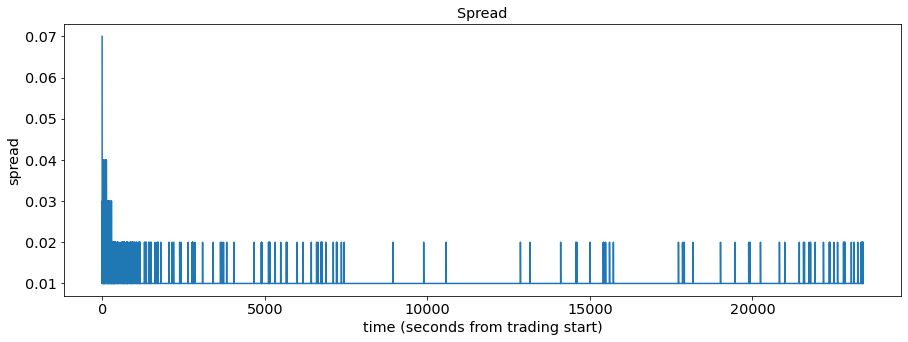

In [123]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

The above plot shows that spread is more than 0.06 in the beginning of the day and slowly drops between 0.02 and 0.01

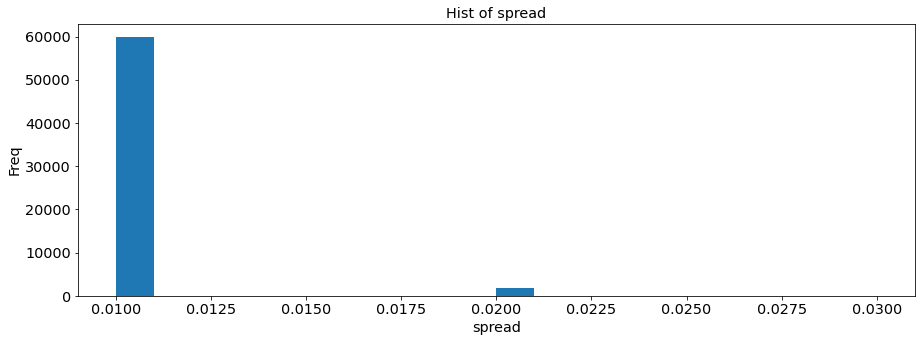

In [124]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

## Volume imbalance

In [125]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

df_rho = pd.DataFrame(rho)
df_rho.describe()

desc_bidvol = np.array(bidvol[:,0])

## Ploting volume imbalance

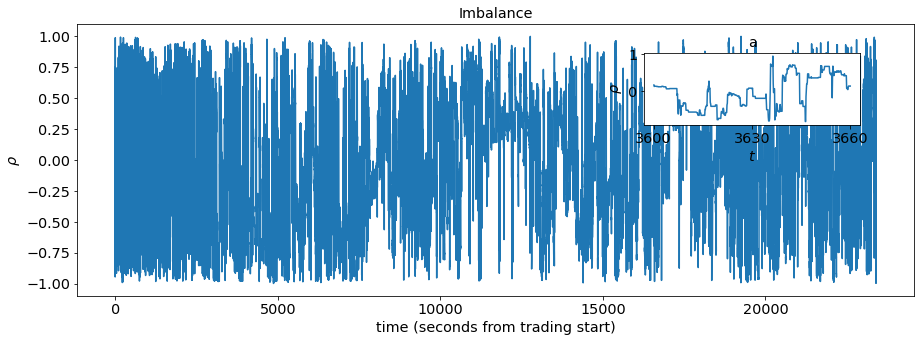

In [126]:
#ploting the volume of imbalance
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

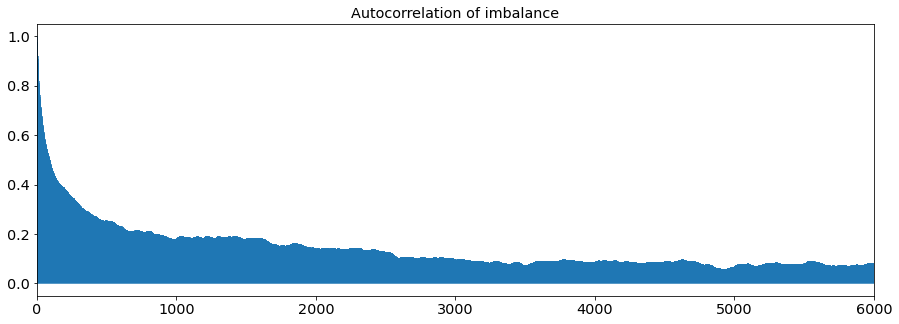

In [127]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

## Liquidation with Permanent Price Impact

The following code computes the optimal speed to trade at 𝜈∗𝑡 and inventory along the optimal strategy 𝑄𝜈∗𝑡.

In [131]:
# Parameter settings
T = 1 # one day
Ndt = 6.5 * 3600 # 6.5 trading hours (in US opening and closing ) * 60*60 (seconds and miniutes) 9.30 to 4pm
dt = T / Ndt 
t = np.arange(0, T + dt, dt)

k = 0.003# parameters -  try with 0.003,  # this is the parameter in CW
b = 0.004 #k and b can be different but should be small number

tau = T - t # time left
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([0.001, 0.01, 0.1]) # inventory penality # in our course we need to compare it with infinity.it is like hold cost then agent will not want to hold 
symb = np.array(["o", "*", "+", "^"])

#apha = 100 #terminal penality # alpha is liquidation penality 

Now we use show the change of the investor's inventory along the optimal path for various levels of the running penalty 𝜙 as 𝛼 changes.

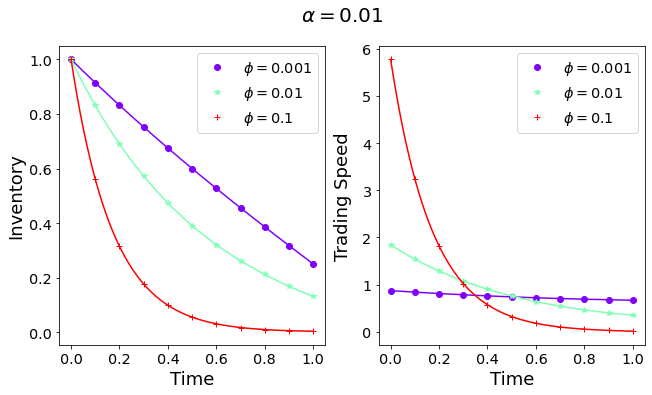

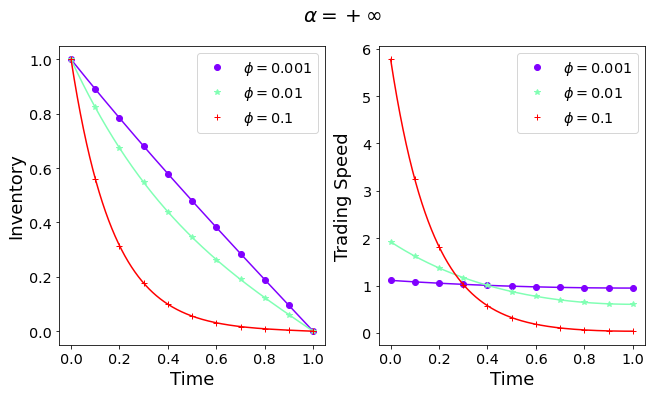

In [132]:
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")